# IPL Boundary Hitting Impact and Pattern Analysis
The Indian Premier League (IPL) has emerged as one of the most popular and prestigious cricket tournaments worldwide. Since its inception in 2008, the IPL has provided a platform for talented cricketers from around the globe to showcase their skills and entertain millions of fans. With its fast-paced and dynamic format, the IPL has witnessed numerous thrilling matches, iconic performances, and remarkable individual achievements.


This project aims to analyse the boundary hitting patterns in the Indian Premier League (IPL) and uncover the strategies employed by batsmen to maximise their scoring potential. With the advent of T20 cricket and its fast-paced nature, boundary-hitting has become a crucial aspect of the game. Understanding the various factors that influence shot selection and the evolving trends in boundary hitting can provide valuable insights for players, coaches, and teams to optimise their strategies and improve their overall performance in the IPL. By examining the data and statistics from recent IPL seasons, this project seeks to unravel the secrets behind successful boundary-hitting in modern cricket.


This has five major steps involved:
1. Importing Libraries
2. Importing Data
3. Cleaning and organising the dataset
4. Feature EDA
5. Data visualisation and analysis

### 1. Importing Libraries

In [82]:
#Importing Common Libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Importing colour palet
import matplotlib.colors
pal = ['#009473', '#00537c', '#b4b4b4', '#da3e21']
cmap = matplotlib.colors.ListedColormap(pal)

### 2. Importing Data

In [83]:
path = "C:/Users/zubin/OneDrive/Desktop/IPL_Ball_by_Ball_2022.csv"
df = pd.read_csv(path)

In [84]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [85]:
df.shape

(17912, 17)

### 3. Cleaning and Organizing Dataset

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17912 entries, 0 to 17911
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 17912 non-null  int64 
 1   innings            17912 non-null  int64 
 2   overs              17912 non-null  int64 
 3   ballnumber         17912 non-null  int64 
 4   batter             17912 non-null  object
 5   bowler             17912 non-null  object
 6   non-striker        17912 non-null  object
 7   extra_type         1050 non-null   object
 8   batsman_run        17912 non-null  int64 
 9   extras_run         17912 non-null  int64 
 10  total_run          17912 non-null  int64 
 11  non_boundary       17912 non-null  int64 
 12  isWicketDelivery   17912 non-null  int64 
 13  player_out         912 non-null    object
 14  kind               912 non-null    object
 15  fielders_involved  704 non-null    object
 16  BattingTeam        17912 non-null  objec

As you can see there are many missing values in the extra_type, player_out, kind, and fielders_involved columns.
So, our next step would be to handle these missing values.

The extra_type and fielders_involved are not relevant to my analysis so I will be removing those values.

In [87]:
df.drop('extra_type', inplace= True, axis= 1)
df.drop('fielders_involved', inplace= True, axis= 1)

In [88]:
df.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'BattingTeam'],
      dtype='object')

In [89]:
df.isna().sum()

ID                      0
innings                 0
overs                   0
ballnumber              0
batter                  0
bowler                  0
non-striker             0
batsman_run             0
extras_run              0
total_run               0
non_boundary            0
isWicketDelivery        0
player_out          17000
kind                17000
BattingTeam             0
dtype: int64

As you can see, there are 17000 missing values in the player_out and kind columns.

Now, we will replace the missing values in the player_out and kind columns with the text 'No Dismissal'.

In [90]:
column_name1 = 'player_out'
df[column_name1] = df[column_name1].fillna('No Dismissal')

coulmn_name2 = 'kind'
df[coulmn_name2] = df[coulmn_name2].fillna('No Dismissal')

In [91]:
df.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,No Dismissal,No Dismissal,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,0,1,1,0,0,No Dismissal,No Dismissal,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,1,0,0,No Dismissal,No Dismissal,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,No Dismissal,No Dismissal,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,No Dismissal,No Dismissal,Rajasthan Royals


### 4. Feature EDA
Now we will be using feature EDA to create new features, which will help us gain further insights into the data and understand the performance of the batsmen and their teams.

Our first step is to create a new dataframe with basic features of the batsmen, like the number of runs scored by them, the number of balls they have faced, their strike rates, and lastly, the number of 4 and 6s hit by them.

In [92]:
Batsman_Info = df.groupby('batter').agg({
    'total_run': 'sum',
    'ballnumber': 'count',
    'batsman_run': [('4s Scored', lambda x: (x == 4).sum()), ('6s Scored', lambda x: (x == 6).sum())]
}).reset_index()

Batsman_Info.columns = ['Batter', 'Total Runs', 'Balls Faced', '4s Scored', '6s Scored']

Batsman_Info['Strike Rate'] = (Batsman_Info['Total Runs'] / Batsman_Info['Balls Faced']) * 100

player_team_map = df[['batter', 'BattingTeam']].drop_duplicates().set_index('batter')['BattingTeam'].to_dict()

Batsman_Info['Team'] = Batsman_Info['Batter'].map(player_team_map)

In [93]:
Batsman_Info

,Batter,Total Runs,Balls Faced,4s Scored,6s Scored,Strike Rate,Team
0,A Badoni,173,139,11,7,124.460432,Lucknow Super Giants
1,A Manohar,112,79,14,3,141.772152,Gujarat Titans
2,A Nortje,2,7,0,0,28.571429,Delhi Capitals
3,A Tomar,4,8,1,0,50.000000,Kolkata Knight Riders
4,AD Russell,349,200,18,32,174.500000,Kolkata Knight Riders
...,...,...,...,...,...,...,...
169,WP Saha,335,266,40,7,125.939850,Gujarat Titans
170,Washington Sundar,113,76,9,3,148.684211,Sunrisers Hyderabad
171,YBK Jaiswal,272,198,28,10,137.373737,Rajasthan Royals
172,YS Chahal,5,8,0,0,62.500000,Rajasthan Royals


In [94]:
sorted_Batsman_Info = Batsman_Info.sort_values('Total Runs', ascending=False)
sorted_Batsman_Info = sorted_Batsman_Info.reset_index(drop= True)
sorted_Batsman_Info

,Batter,Total Runs,Balls Faced,4s Scored,6s Scored,Strike Rate,Team
0,JC Buttler,894,596,84,45,150.000000,Rajasthan Royals
1,KL Rahul,653,472,45,30,138.347458,Lucknow Super Giants
2,Q de Kock,526,350,47,23,150.285714,Lucknow Super Giants
3,HH Pandya,512,387,49,12,132.299742,Gujarat Titans
4,Shubman Gill,505,374,51,11,135.026738,Gujarat Titans
...,...,...,...,...,...,...,...
169,RP Meredith,0,1,0,0,0.000000,Mumbai Indians
170,NT Ellis,0,2,0,0,0.000000,Punjab Kings
171,KR Sen,0,3,0,0,0.000000,Rajasthan Royals
172,KK Ahmed,0,2,0,0,0.000000,Delhi Capitals


The next step in our EDA is to further split our existing information. We will split the number of boundaries scored by a batsman into three major parts according to when the batsman has scored those runs. We will create three groups : 
1. Boundaries scored in powerplay
2. Boundaries scored in death overs
3. Boundaries scored in the middle overs. 

In [95]:
def count_boundaries(df, start_over, end_over):
    boundaries = df.loc[(df['overs'] >= start_over) & (df['overs'] <= end_over) & ((df['batsman_run'] == 4) | (df['batsman_run'] == 6))]
    return len(boundaries)

# Create a new DataFrame to store the boundary distribution for individual batsmen
boundary_distribution = pd.DataFrame(columns=['Batter', 'Boundaries in Power Play', 'Boundaries in Middle Overs', 'Boundaries in Death Overs'])

# Iterate over each unique batsman
for batter in df['batter'].unique():
    batter_data = df[df['batter'] == batter]
    boundaries_0_5 = count_boundaries(batter_data, 0, 5)
    boundaries_6_15 = count_boundaries(batter_data, 6, 15)
    boundaries_16_20 = count_boundaries(batter_data, 16, 20)
    batter_row = {
        'Batter': batter,
        'Boundaries in Power Play': boundaries_0_5,
        'Boundaries in Middle Overs': boundaries_6_15,
        'Boundaries in Death Overs': boundaries_16_20
    }
    boundary_distribution = pd.concat([boundary_distribution, pd.DataFrame(batter_row, index=[0])], ignore_index=True)

In [96]:
merged_df = pd.merge(sorted_Batsman_Info, boundary_distribution, on='Batter')

In [97]:
final_df = merged_df
final_df['Boundaries in Power Play'] = final_df['Boundaries in Power Play'].astype(int)
final_df['Boundaries in Middle Overs'] = final_df['Boundaries in Middle Overs'].astype(int)
final_df['Boundaries in Death Overs'] = final_df['Boundaries in Death Overs'].astype(int)
final_df

,Batter,Total Runs,Balls Faced,4s Scored,6s Scored,Strike Rate,Team,Boundaries in Power Play,Boundaries in Middle Overs,Boundaries in Death Overs
0,JC Buttler,894,596,84,45,150.000000,Rajasthan Royals,63,47,19
1,KL Rahul,653,472,45,30,138.347458,Lucknow Super Giants,26,31,18
2,Q de Kock,526,350,47,23,150.285714,Lucknow Super Giants,38,23,9
3,HH Pandya,512,387,49,12,132.299742,Gujarat Titans,10,39,12
4,Shubman Gill,505,374,51,11,135.026738,Gujarat Titans,33,26,3
...,...,...,...,...,...,...,...,...,...,...
169,RP Meredith,0,1,0,0,0.000000,Mumbai Indians,0,0,0
170,NT Ellis,0,2,0,0,0.000000,Punjab Kings,0,0,0
171,KR Sen,0,3,0,0,0.000000,Rajasthan Royals,0,0,0
172,KK Ahmed,0,2,0,0,0.000000,Delhi Capitals,0,0,0


Next, we will figure out how many of the total runs scored by the batsman come from boundaries and then calculate the boundary run percentage. This is done to determine the boundary scoring patterns for the most successful IPL batsmen of 2022.

In [98]:
# Calculate the total runs scored from boundaries
df['Boundary Runs'] = df['batsman_run'].apply(lambda x: x if x == 4 or x == 6 else 0)
boundary_runs = df.groupby('batter')['Boundary Runs'].sum()

# Merge the boundary runs information with the final_df dataframe
Batsmen_df = final_df.merge(boundary_runs, left_on='Batter', right_index=True)

# Calculate the percentage of runs scored from boundaries
Batsmen_df['Boundary Contribution'] = Batsmen_df['Boundary Runs'] / Batsmen_df['Total Runs'] * 100

In [99]:
Batsmen_df

,Batter,Total Runs,Balls Faced,4s Scored,6s Scored,Strike Rate,Team,Boundaries in Power Play,Boundaries in Middle Overs,Boundaries in Death Overs,Boundary Runs,Boundary Contribution
0,JC Buttler,894,596,84,45,150.000000,Rajasthan Royals,63,47,19,606,67.785235
1,KL Rahul,653,472,45,30,138.347458,Lucknow Super Giants,26,31,18,360,55.130168
2,Q de Kock,526,350,47,23,150.285714,Lucknow Super Giants,38,23,9,326,61.977186
3,HH Pandya,512,387,49,12,132.299742,Gujarat Titans,10,39,12,268,52.343750
4,Shubman Gill,505,374,51,11,135.026738,Gujarat Titans,33,26,3,270,53.465347
...,...,...,...,...,...,...,...,...,...,...,...,...
169,RP Meredith,0,1,0,0,0.000000,Mumbai Indians,0,0,0,0,NaN
170,NT Ellis,0,2,0,0,0.000000,Punjab Kings,0,0,0,0,NaN
171,KR Sen,0,3,0,0,0.000000,Rajasthan Royals,0,0,0,0,NaN
172,KK Ahmed,0,2,0,0,0.000000,Delhi Capitals,0,0,0,0,NaN


This step completes the EDA phase for the batsmen and how they score their runs.

Next, we will move on to the teams and take a look at their boundary scoring patterns.

We will create a team analysis dataframe, with various columns to analyse the performance of team and understand how hitting boundaries can contribute to the success of the team.

In [100]:
Team_df = pd.DataFrame({
    '4s Scored': df[df['batsman_run'] == 4].groupby('BattingTeam')['batsman_run'].count(),
    '6s Scored': df[df['batsman_run'] == 6].groupby('BattingTeam')['batsman_run'].count(),
    'Percentage of Runs from Boundaries': (df[df['non_boundary'] == 0].groupby('BattingTeam')['batsman_run'].sum() / df.groupby('BattingTeam')['total_run'].sum()) * 100,
    'Boundaries in Powerplay': df[(df['overs'] >= 0) & (df['overs'] <= 5)].groupby('BattingTeam')['batsman_run'].count(),
    'Boundaries in Middle Overs': df[(df['overs'] > 5) & (df['overs'] <= 15)].groupby('BattingTeam')['batsman_run'].count(),
    'Boundaries in Death Overs': df[(df['overs'] > 15) & (df['overs'] <= 20)].groupby('BattingTeam')['batsman_run'].count()
})

# Sort the DataFrame in descending order of percentage of runs from boundaries
Team_df = Team_df.sort_values(by='Percentage of Runs from Boundaries', ascending=False)

In [101]:
Team_df

,4s Scored,6s Scored,Percentage of Runs from Boundaries,Boundaries in Powerplay,Boundaries in Middle Overs,Boundaries in Death Overs
BattingTeam,,,,,,
Rajasthan Royals,251,137,95.107034,633,1050,424
Kolkata Knight Riders,177,113,94.871795,522,858,254
Sunrisers Hyderabad,170,97,94.856623,517,818,288
Delhi Capitals,205,106,94.745835,525,842,283
Mumbai Indians,173,100,94.722598,524,855,312
Gujarat Titans,250,79,94.517462,599,988,384
Chennai Super Kings,184,103,94.449301,527,870,322
Lucknow Super Giants,188,115,94.387755,555,917,368
Punjab Kings,200,110,93.597951,528,883,301


This completes the EDA phase of our project and now, we can move on to the data visualization and analysis phase of our project.

### 5. Data Visualisation and Analysis

First, we will visualise and analyse the data of individual batsmen and how many different factors determine boundary hitting patterns.

To start our analysis, we will look at the overall scoring patterns for all batsmen and understand which overs are the most targeted ones.

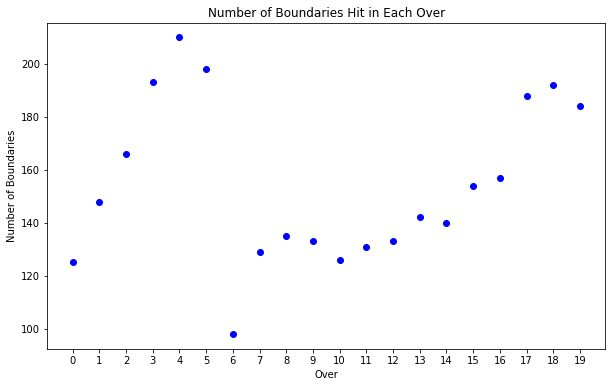

In [102]:
# Calculate the number of boundaries hit in each over
boundaries_per_over = df.groupby('overs')['batsman_run'].apply(lambda x: ((x == 4) | (x == 6)).sum()).reset_index()

# Create a scatterplot for boundaries per over
plt.figure(figsize=(10, 6))
plt.scatter(boundaries_per_over['overs'], boundaries_per_over['batsman_run'], color='blue')
plt.xlabel('Over')
plt.ylabel('Number of Boundaries')
plt.title('Number of Boundaries Hit in Each Over')
plt.xticks(np.arange(0, 20, 1))  # Set the x-axis tick labels from 1 to 20
plt.show()

As you can see, the most boundaries are scored in the final over of the powerplay to make the most of the playing conditions and limited fielders on the boundary.

Next, we will first display the top 20 players with the most boundaries hit.

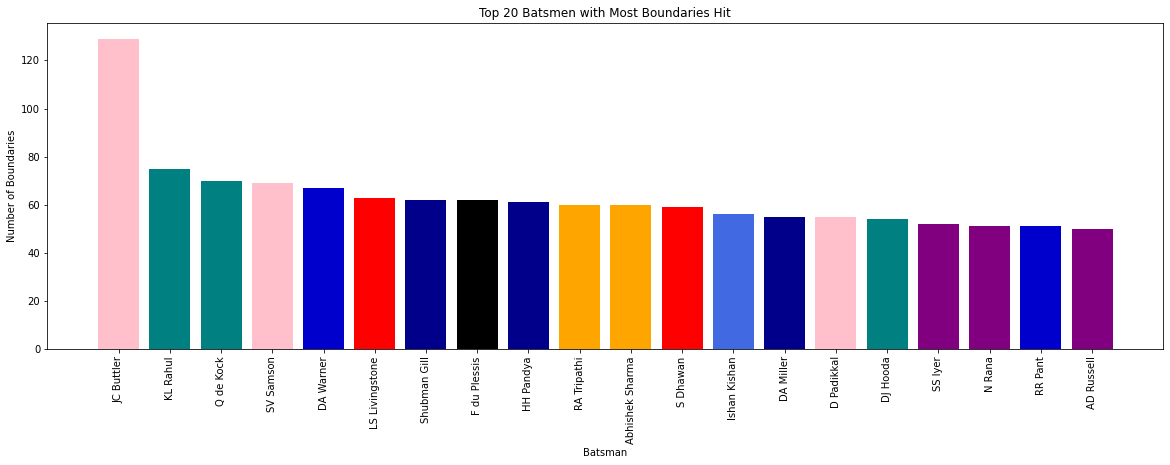

In [103]:
# Color mapping dictionary for teams
team_colors = {
    'Rajasthan Royals': 'pink',
    'Gujarat Titans': 'darkblue',
    'Chennai Super Kings': 'yellow',
    'Lucknow Super Giants': 'teal',
    'Mumbai Indians': 'royalblue',
    'Royal Challengers Bangalore': 'black',
    'Kolkata Knight Riders': 'purple',
    'Punjab Kings': 'red',
    'Delhi Capitals': 'mediumblue',
    'Sunrisers Hyderabad': 'orange'
}

# Calculate the total boundaries (4s and 6s) for each batsman
Batsmen_df['Total Boundaries'] = Batsmen_df['4s Scored'] + Batsmen_df['6s Scored']

# Sort the final_df dataframe by the 'Total Boundaries' column in descending order
top_20_batsmen = Batsmen_df.sort_values(by='Total Boundaries', ascending=False).head(20)

# Create a bar chart to visualize the top 10 batsmen with most boundaries hit
plt.figure(figsize=(20, 6))
plt.bar(top_20_batsmen['Batter'], top_20_batsmen['Total Boundaries'], color=[team_colors.get(team, 'gray') for team in top_20_batsmen['Team']])
plt.xlabel('Batsman')
plt.ylabel('Number of Boundaries')
plt.title('Top 20 Batsmen with Most Boundaries Hit')
plt.xticks(rotation=90)
plt.show()

As you can see, out of the top 20 batsmen with the most boundaries, nine of the batsmen are openers, clearly indicating that batting higher up in the order gives batsmen more chances to score boundaries and then score more runs.

To get a further analysis on these top 20 batsmen, and specifically the openers, we will figure out the boundary hitting patterns for these batsmen according to the phase of the game going on.

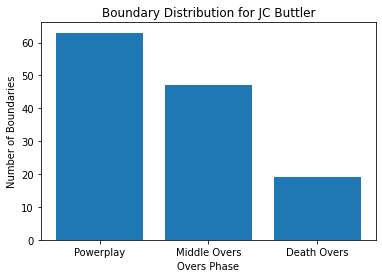

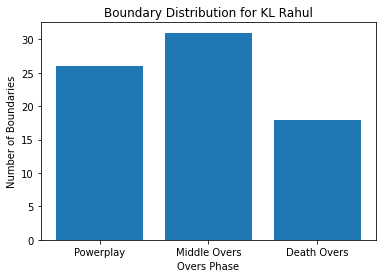

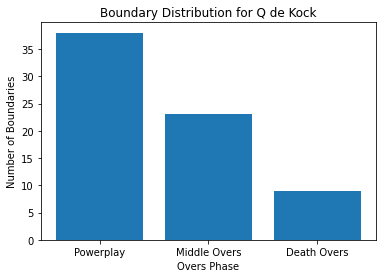

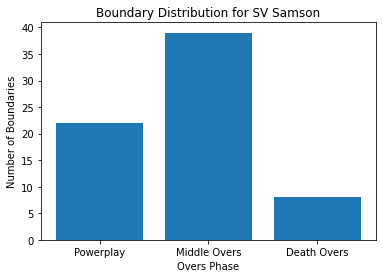

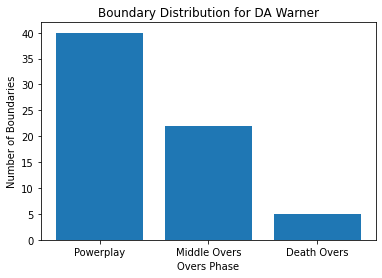

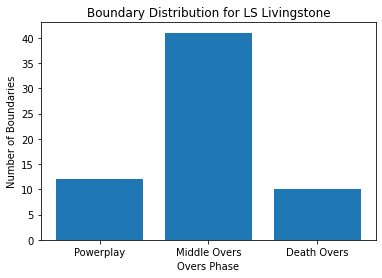

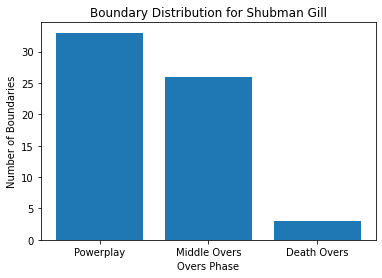

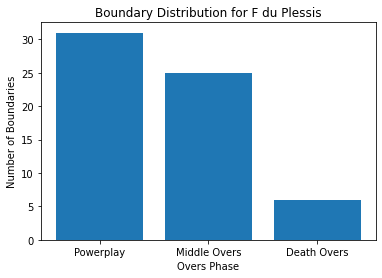

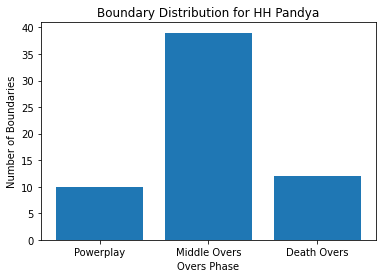

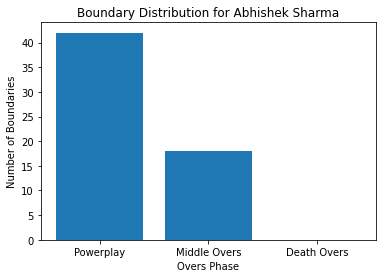

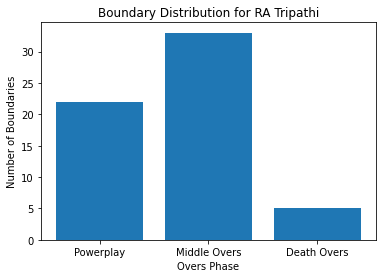

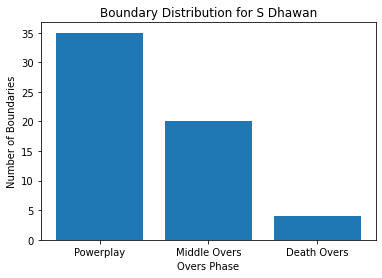

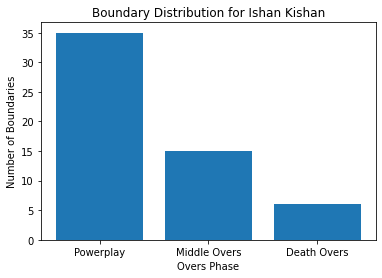

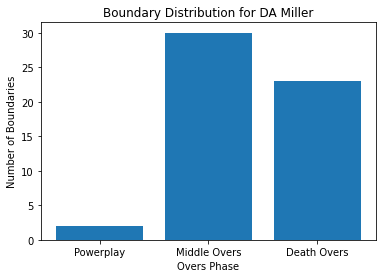

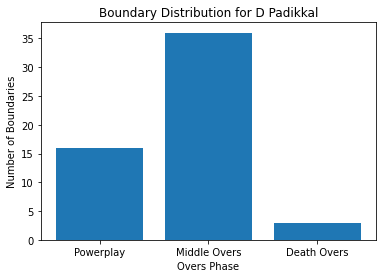

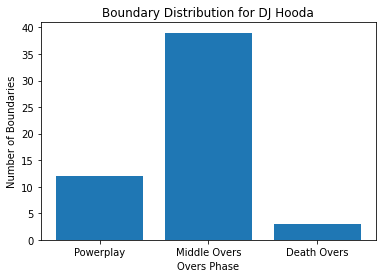

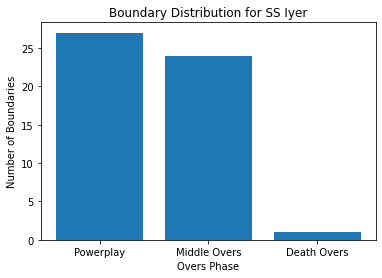

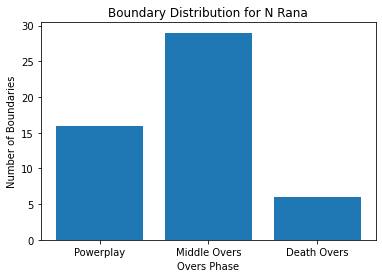

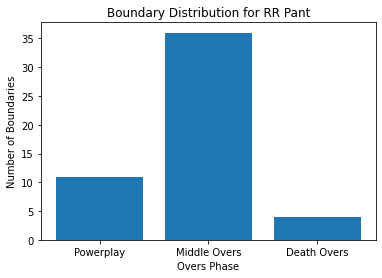

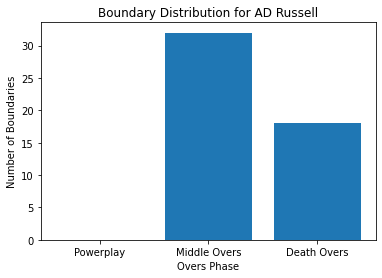

In [104]:
# Select the top 10 batsmen with most boundaries
top_20_batsmen = Batsmen_df.nlargest(20, 'Total Boundaries')

# Create a bar chart for each batsman's boundary distribution
for _, row in top_20_batsmen.iterrows():
    batsman_name = row['Batter']
    powerplay_boundaries = row['Boundaries in Power Play']
    middle_overs_boundaries = row['Boundaries in Middle Overs']
    death_overs_boundaries = row['Boundaries in Death Overs']

    phases = ['Powerplay', 'Middle Overs', 'Death Overs']
    boundaries_count = [powerplay_boundaries, middle_overs_boundaries, death_overs_boundaries]

    plt.bar(phases, boundaries_count)
    plt.xlabel('Overs Phase')
    plt.ylabel('Number of Boundaries')
    plt.title(f'Boundary Distribution for {batsman_name}')
    plt.show()

These bar charts show varying stats but with one common factor, which is that the position at which the batsman bats is significant in determining in which phase he will score most of his runs.

Let's take this analysis a step further and plot the batsmen with the most boundaries in the powerplay.

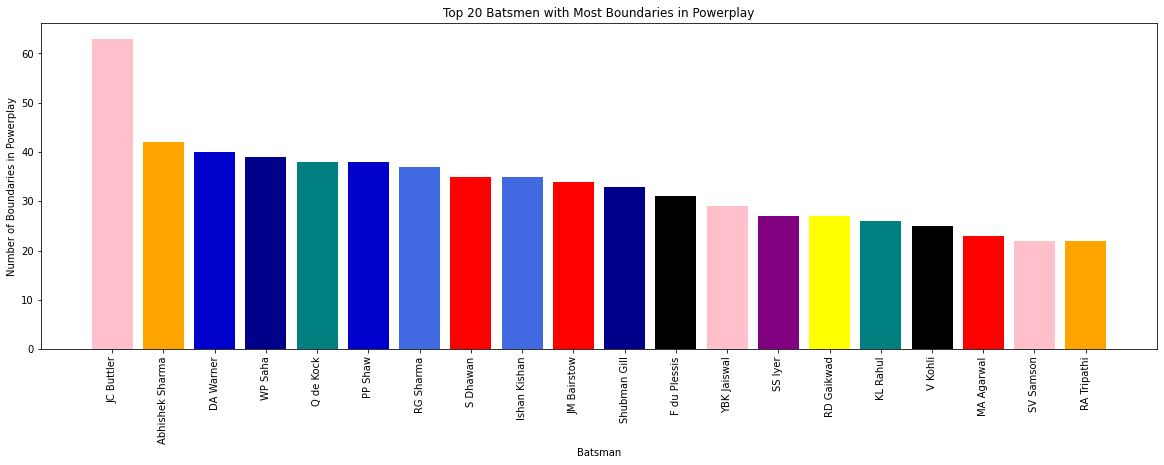

In [105]:
# Select the top 10 batsmen with most boundaries in the powerplay
top_20_powerplay_batsmen = Batsmen_df.nlargest(20, 'Boundaries in Power Play')


# Create a bar chart to visualize the top 10 batsmen with most boundaries in the powerplay
plt.figure(figsize=(20, 6))
plt.bar(top_20_powerplay_batsmen['Batter'], top_20_powerplay_batsmen['Boundaries in Power Play'], color=[team_colors.get(team, 'gray') for team in top_20_powerplay_batsmen['Team']])
plt.xlabel('Batsman')
plt.ylabel('Number of Boundaries in Powerplay')
plt.title('Top 20 Batsmen with Most Boundaries in Powerplay')
plt.xticks(rotation=90)
plt.show()

As you can see, 16 of the 20 batsmen who have scored the most boundaries in the powerplay are openers, signifying the fact that the openers tend to rule the run scoring in the powerplay. 

Also, one more thing we must notice is that nine of the top 20 boundary hitters in the powerplay belong to teams that qualified for the playoffs, signifying the need for a dynamic opener in the powerplay. 

The last thing we can see is that every single one of these batters is known for their game against the faster bowlers, which tend to be the bowlers who bowl in the powerplay.

The next step of our analysis moves to the middle overs. 

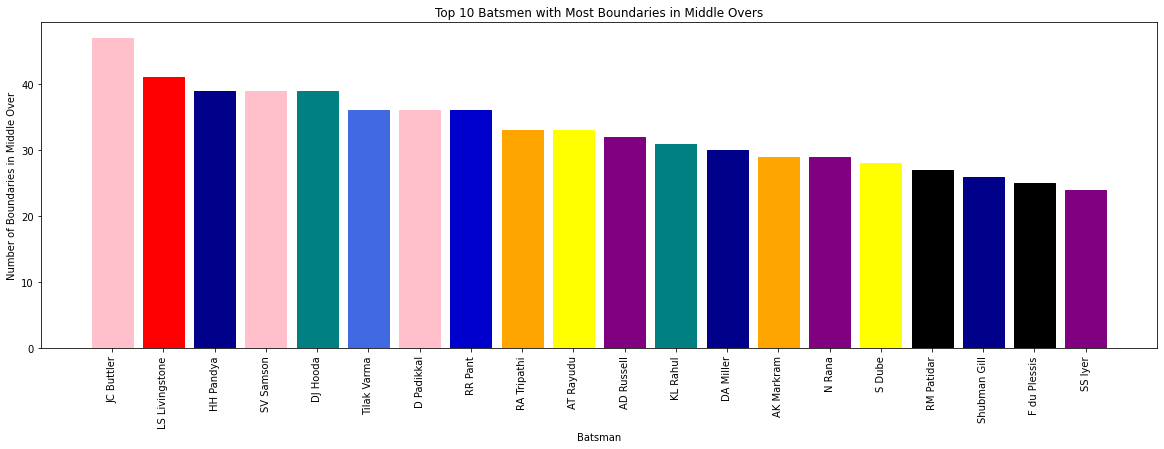

In [106]:
# Select the top 10 batsmen with most boundaries in the middle overs
top_10_middleover_batsmen = Batsmen_df.nlargest(20, 'Boundaries in Middle Overs')

# Create a bar chart to visualize the top 10 batsmen with most boundaries in the middle overs
plt.figure(figsize=(20, 6))
bars = plt.bar(top_10_middleover_batsmen['Batter'], top_10_middleover_batsmen['Boundaries in Middle Overs'])
for bar, team in zip(bars, top_10_middleover_batsmen['Team']):
    bar.set_color(team_colors.get(team, 'gray'))
plt.xlabel('Batsman')
plt.ylabel('Number of Boundaries in Middle Over')
plt.title('Top 10 Batsmen with Most Boundaries in Middle Overs')
plt.xticks(rotation=90)
plt.show()

As you can see, 11 of the 20 batsmen with the most boundaries in the middle overs are the ones batting at positions 3 and 4. The batsmen batting at positions 3 and 4 are usually called anchors. The role of an anchor in a team is to control the flow of the innings in the middle overs. These anchors are characterised by supreme ball manoeuvring, spin-bashing capabilities, and a keen sense of the game. So this once again proves our hypothesis that batting positions are highly influential in determining the phase of the game that the batsman has an impact on.


As we know, the middle overs are a phase of the game where usually spin bowlers and medium pacers operate. If you notice, 14 of the top 20 batsmen are of Indian nationality. This is due to the fact that Indian batsmen usually have a rather superior game against spin due to their training on subcontinent pitches.


Also, Jos Buttler was on fire in this tournament. No wonder the Rajasthan Royals managed to reach the finals!


The next part of our analysis takes us to the end.

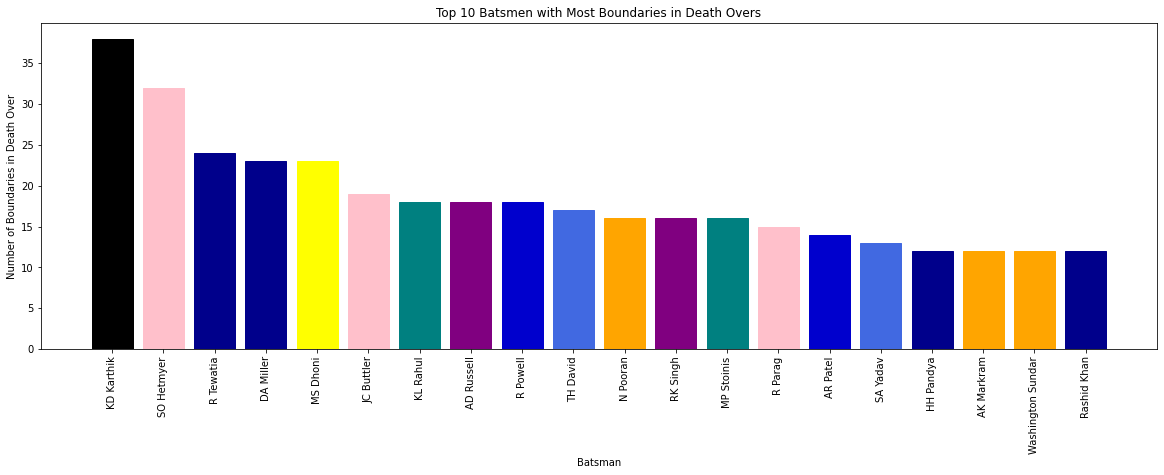

In [107]:
# Select the top 10 batsmen with most boundaries in the middle overs
top_10_deathover_batsmen = Batsmen_df.nlargest(20, 'Boundaries in Death Overs')

# Create a bar chart to visualize the top 10 batsmen with most boundaries in the Death overs
plt.figure(figsize=(20, 6))
bars = plt.bar(top_10_deathover_batsmen['Batter'], top_10_deathover_batsmen['Boundaries in Death Overs'])
for bar, team in zip(bars, top_10_deathover_batsmen['Team']):
    bar.set_color(team_colors.get(team, 'gray'))
plt.xlabel('Batsman')
plt.ylabel('Number of Boundaries in Death Over')
plt.title('Top 10 Batsmen with Most Boundaries in Death Overs')
plt.xticks(rotation=90)
plt.show()

As you can see from the above bar graph, 15 of the 20 batsmen with the most boundaries in the death overs are the ones batting at positions 5, 6, and 7. These batsmen are usually deemed finishers, and their role is to build partnerships around the anchor and play the big shots in the death overs to finish the innings on a high. The role of a finisher is quite demanding, requiring tonnes of experience, and the ability to handle stress is absolutely key. This is why most of the above-listed players are seasoned finishers rather than uncapped youngsters who have perfected their craft over years of playing cricket.


Also, you can see that 10 of the 20 above-listed batsmen belong to teams that qualify for the playoffs, signifying how important the ability of these batsmen to finish the innings well is to the success of the team.


Now this marks the end of our player analysis, and we then move onto the analysis of teams.

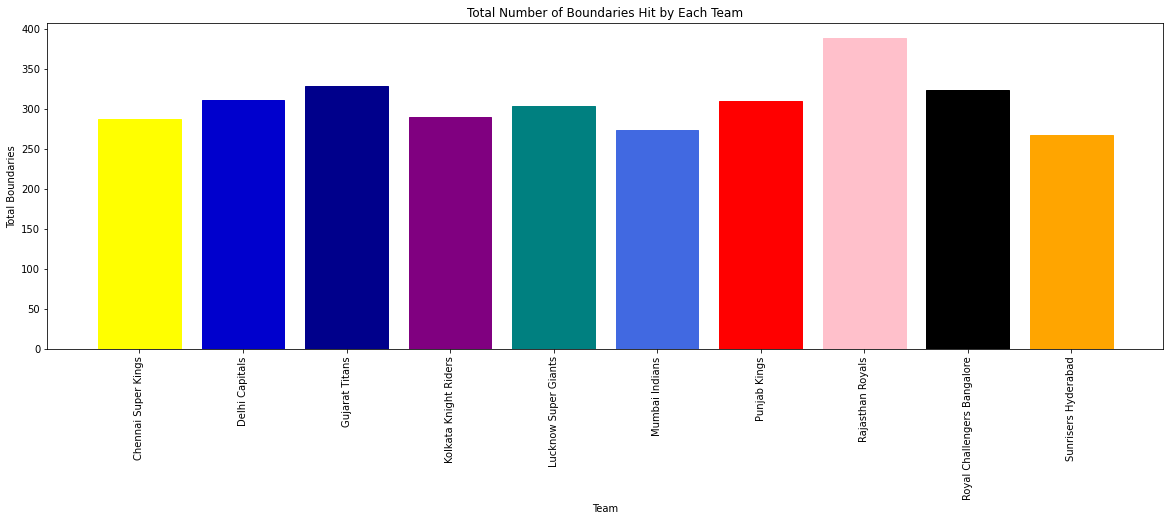

In [108]:
team_boundaries = Team_df.groupby('BattingTeam')[['4s Scored', '6s Scored']].sum()

# Create a bar chart to visualize the total number of boundaries hit by all teams
plt.figure(figsize=(20, 6))
bars = plt.bar(team_boundaries.index, team_boundaries['4s Scored'] + team_boundaries['6s Scored'])
for bar, team in zip(bars, team_boundaries.index):
    bar.set_color(team_colors.get(team, 'gray'))
plt.xlabel('Team')
plt.ylabel('Total Boundaries')
plt.title('Total Number of Boundaries Hit by Each Team')
plt.xticks(rotation=90)
plt.show()

As you can see, the top 4 teams with the most boundaries are the ones who qualified for the playoffs (GT, RR, LSG, and RCB), and the team with the lowest number of boundaries finished with a wooden spoon (MI). This shows us the direct correlation that the boundary-hitting capabilities of a team are a very important factor in the team's success.


Now let's take a look at the powerplay boundaries.

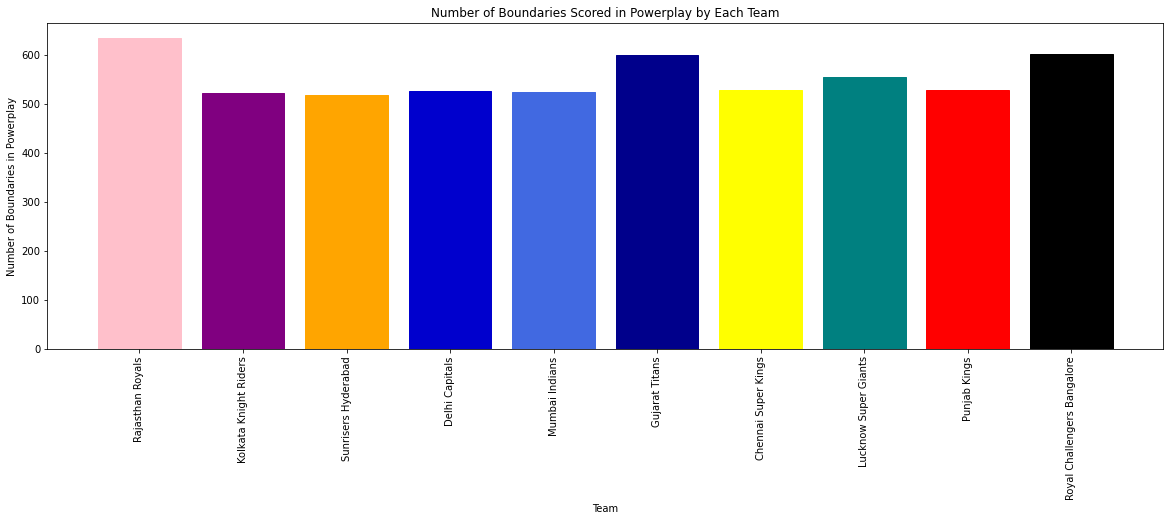

In [109]:
# Calculate the number of boundaries scored in the powerplay by each team
powerplay_boundaries = Team_df['Boundaries in Powerplay']

# Create a bar chart to visualize the number of boundaries scored in the powerplay by each team
plt.figure(figsize=(20, 6))
bars = plt.bar(powerplay_boundaries.index, powerplay_boundaries.values)
for bar, team in zip(bars, powerplay_boundaries.index):
    bar.set_color(team_colors.get(team, 'gray'))
plt.xlabel('Team')
plt.ylabel('Number of Boundaries in Powerplay')
plt.title('Number of Boundaries Scored in Powerplay by Each Team')
plt.xticks(rotation=90)
plt.show()

Upon looking at the graph for the powerplay overs, we can see that the four teams (GT, RR, LSG, and RCB) that qualified for the playoffs have a greater number of boundaries in the powerplay overs. Although the boundaries they hit are greater, they do not differ from the other teams by a significant margin.


Next up are the middle overs.

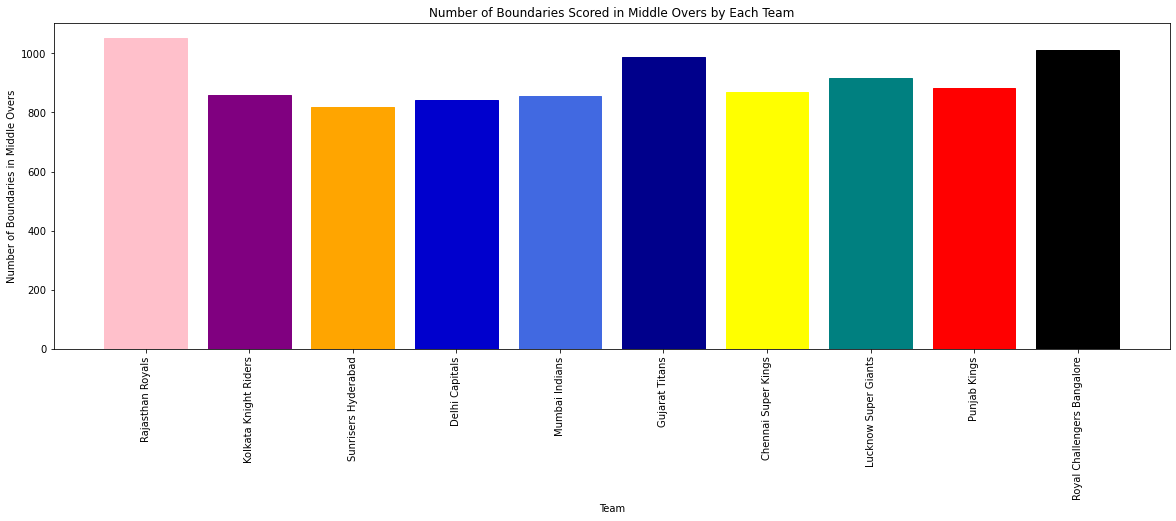

In [110]:
# Calculate the number of boundaries scored in the middle overs by each team
middle_overs_boundaries = Team_df['Boundaries in Middle Overs']

# Create a bar chart to visualize the number of boundaries scored in the middle overs by each team
plt.figure(figsize=(20, 6))
bars = plt.bar(middle_overs_boundaries.index, middle_overs_boundaries.values)
for bar, team in zip(bars, middle_overs_boundaries.index):
    bar.set_color(team_colors.get(team, 'gray'))
plt.xlabel('Team')
plt.ylabel('Number of Boundaries in Middle Overs')
plt.title('Number of Boundaries Scored in Middle Overs by Each Team')
plt.xticks(rotation=90)
plt.show()

The middle overs show a similar trend to the powerplay overs, with the playoff teams scoring more boundaries than the others, but not by a significantly greater amount.


Lastly, let's look at the deaths.

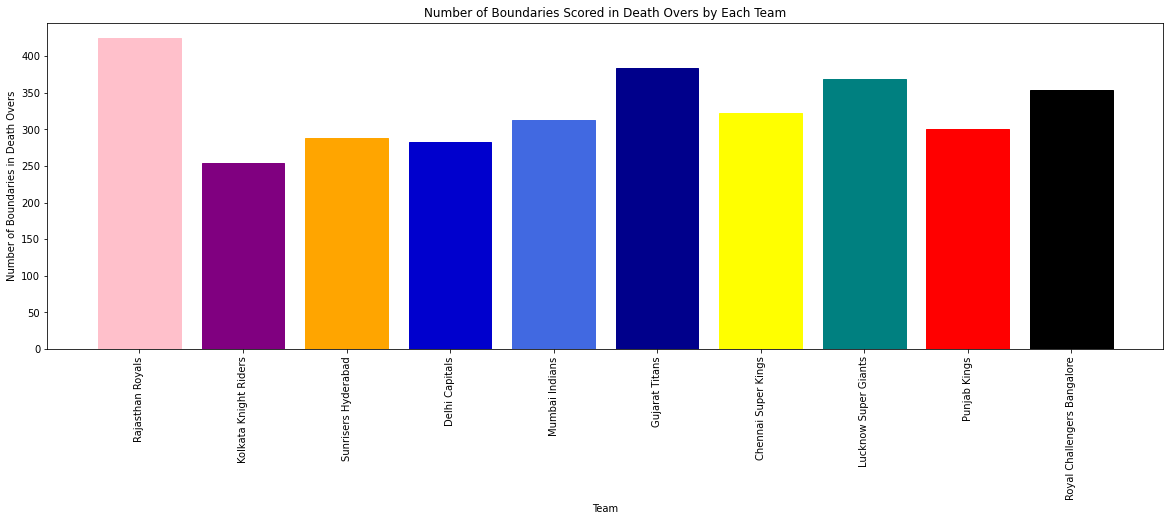

In [111]:
# Calculate the number of boundaries scored in the death overs by each team
death_overs_boundaries = Team_df['Boundaries in Death Overs']

# Create a bar chart to visualize the number of boundaries scored in the death overs by each team
plt.figure(figsize=(20, 6))
bars = plt.bar(death_overs_boundaries.index, death_overs_boundaries.values)
for bar, team in zip(bars, death_overs_boundaries.index):
    bar.set_color(team_colors.get(team, 'gray'))
plt.xlabel('Team')
plt.ylabel('Number of Boundaries in Death Overs')
plt.title('Number of Boundaries Scored in Death Overs by Each Team')
plt.xticks(rotation=90)
plt.show()

Upon plotting this graph, we notice one significant trend. This is where the playoff teams have done significantly better than the other teams in the death overs. As you can see, the four teams have scored significantly more boundaries in the overs (16–20) as compared to the other teams.


Boundaries scored in the death overs have a high impact because of their importance not only to the context of the game but also because of their impact on the mentality of the opponents.


As a result of our analysis, we can significantly come to two conclusions:
1. Scoring boundaries in each phase of the game is highly important to not lose momentum.
2. Boundaries in the death overs have the most impact on the success of the team and the player.